In [116]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math

# World Bank Data
## World Bank web API

In [117]:
# generate URL based on indicator
indicator = 'IS.RRS.GOOD.MT.K6'
url = f'https://api.worldbank.org/v2/sources/57/country/all/series/{indicator}/time/all/data?format=json'

In [118]:
# Send get request
response = requests.request("GET", url)

status_code = response.status_code
result = response.text
status_code

200

In [119]:
# Raw JSON
result

'{"page":1,"pages":46692,"per_page":50,"total":2334592,"lastupdated":"2023-08-10","source":{"id":"57","name":"WDI Database Archives","data":[{"variable":[{"concept":"Country","id":"AFG","value":"Afghanistan"},{"concept":"Version","id":"198904","value":"1989 Apr"},{"concept":"Series","id":"IS.RRS.GOOD.MT.K6","value":"Railways, goods transported (million ton-km)"},{"concept":"Time","id":"YR2023","value":"2023"}],"value":null},{"variable":[{"concept":"Country","id":"AFG","value":"Afghanistan"},{"concept":"Version","id":"198904","value":"1989 Apr"},{"concept":"Series","id":"IS.RRS.GOOD.MT.K6","value":"Railways, goods transported (million ton-km)"},{"concept":"Time","id":"YR2022","value":"2022"}],"value":null},{"variable":[{"concept":"Country","id":"AFG","value":"Afghanistan"},{"concept":"Version","id":"198904","value":"1989 Apr"},{"concept":"Series","id":"IS.RRS.GOOD.MT.K6","value":"Railways, goods transported (million ton-km)"},{"concept":"Time","id":"YR2021","value":"2021"}],"value":null

In [120]:
# JSON of data
str(pd.read_json(result)['source'][0]).strip('[]')

"{'variable': [{'concept': 'Country', 'id': 'AFG', 'value': 'Afghanistan'}, {'concept': 'Version', 'id': '198904', 'value': '1989 Apr'}, {'concept': 'Series', 'id': 'IS.RRS.GOOD.MT.K6', 'value': 'Railways, goods transported (million ton-km)'}, {'concept': 'Time', 'id': 'YR2023', 'value': '2023'}], 'value': None}, {'variable': [{'concept': 'Country', 'id': 'AFG', 'value': 'Afghanistan'}, {'concept': 'Version', 'id': '198904', 'value': '1989 Apr'}, {'concept': 'Series', 'id': 'IS.RRS.GOOD.MT.K6', 'value': 'Railways, goods transported (million ton-km)'}, {'concept': 'Time', 'id': 'YR2022', 'value': '2022'}], 'value': None}, {'variable': [{'concept': 'Country', 'id': 'AFG', 'value': 'Afghanistan'}, {'concept': 'Version', 'id': '198904', 'value': '1989 Apr'}, {'concept': 'Series', 'id': 'IS.RRS.GOOD.MT.K6', 'value': 'Railways, goods transported (million ton-km)'}, {'concept': 'Time', 'id': 'YR2021', 'value': '2021'}], 'value': None}, {'variable': [{'concept': 'Country', 'id': 'AFG', 'value'

As you may have noticed, this is a little rough to use. Let's try their other API.

## World Bank WBGAPI variety

Rail Cargo

In [121]:
railcargo = wb.data.DataFrame('IS.RRS.GOOD.MT.K6', time=range(2006, 2020), skipBlanks=True, columns='series')
railcargo.reset_index(inplace=True)
railcargo

,economy,time,IS.RRS.GOOD.MT.K6
0,ALB,YR2006,36.0
1,ALB,YR2007,53.0
2,ALB,YR2008,52.0
3,ALB,YR2009,46.0
4,ALB,YR2010,66.0
...,...,...,...
1235,ZAF,YR2008,113342.0
1236,ZMB,YR2017,297.0
1237,ZWE,YR2007,1580.0
1238,ZWE,YR2018,1078.0


In [122]:
railcargo.to_csv('./Data/railcargo.csv', index = False)

Percent Urban

In [123]:
percent_urban = wb.data.DataFrame('SP.URB.TOTL.IN.ZS', time=range(2006, 2020), skipBlanks=True, columns='series')
percent_urban.reset_index(inplace=True)
percent_urban

,economy,time,SP.URB.TOTL.IN.ZS
0,ABW,YR2006,44.511
1,ABW,YR2007,44.147
2,ABW,YR2008,43.783
3,ABW,YR2009,43.421
4,ABW,YR2010,43.059
...,...,...,...
3677,ZWE,YR2015,32.385
3678,ZWE,YR2016,32.296
3679,ZWE,YR2017,32.237
3680,ZWE,YR2018,32.209


In [124]:
percent_urban.to_csv('./Data/percent_urban.csv', index = False)

GDP

In [125]:
GDP = wb.data.DataFrame('NY.GDP.MKTP.CD', time=range(2006, 2020), skipBlanks=True, columns='series')
GDP.reset_index(inplace=True)
GDP

,economy,time,NY.GDP.MKTP.CD
0,ABW,YR2006,2.469832e+09
1,ABW,YR2007,2.677654e+09
2,ABW,YR2008,2.843017e+09
3,ABW,YR2009,2.553631e+09
4,ABW,YR2010,2.453631e+09
...,...,...,...
3600,ZWE,YR2015,1.996312e+10
3601,ZWE,YR2016,2.054868e+10
3602,ZWE,YR2017,1.758489e+10
3603,ZWE,YR2018,3.415607e+10


In [126]:
GDP.to_csv('./Data/GDP.csv', index = False)

Size of service industry

In [127]:
service_percent = wb.data.DataFrame('NV.SRV.TOTL.ZS', time=range(2006, 2020), skipBlanks=True, columns='series')
service_percent.reset_index(inplace=True)
service_percent

,economy,time,NV.SRV.TOTL.ZS
0,ABW,YR2006,73.745691
1,ABW,YR2007,72.051554
2,ABW,YR2008,73.152741
3,ABW,YR2009,75.771210
4,ABW,YR2010,78.543443
...,...,...,...
3408,ZWE,YR2015,58.651060
3409,ZWE,YR2016,60.409902
3410,ZWE,YR2017,60.591645
3411,ZWE,YR2018,55.984768


In [128]:
service_percent.to_csv('./Data/service_percent.csv', index = False)

## electricity consumption 
taken from https://www.eia.gov/international/data/world/electricity/electricity-consumption

In [129]:
energy_consumption = pd.read_csv('Data/INT-Export-11-16-2023_15-35-19.csv')
energy_consumption.rename(columns = {'Unnamed: 1':'Country'}, inplace=True)
energy_consumption.drop('API', axis=1, inplace=True)
energy_consumption = energy_consumption.iloc[1: , :]
energy_consumption = energy_consumption.melt(id_vars=['Country'], var_name= 'year', value_name='energy_consumption')

Drop NAs and --

In [130]:
energy_consumption.replace(to_replace='--',value=np.nan, inplace=True)
energy_consumption.dropna(inplace=True)
energy_consumption.rename(columns={'year':'Year'}, inplace=True)
energy_consumption['Country'] = [item.strip() for item in energy_consumption['Country']]
energy_consumption

,Country,Year,energy_consumption
0,World,1980,7323.372305717931
1,Afghanistan,1980,0.87606
2,Albania,1980,2.974
3,Algeria,1980,5.915
4,American Samoa,1980,0.0651
...,...,...,...
9697,Wake Island,2021,0
9698,Western Sahara,2021,0
9699,Yemen,2021,2.931320206
9700,Zambia,2021,14.320751558


In [131]:
energy_consumption.to_csv('./Data/energy_consumption.csv', index = False)

## Democracy

In [132]:
wiki_page_request = requests.get("https://en.wikipedia.org/wiki/The_Economist_Democracy_Index")
wiki_page_text = wiki_page_request.text

soup = BeautifulSoup(wiki_page_text, 'html.parser')

In [133]:
tables = soup.find('table',{'class':"wikitable"})
tables=pd.read_html('https://en.wikipedia.org/wiki/The_Economist_Democracy_Index')
democracy = tables[5]
democracy.drop(['2022 rank', 'Regime type'], axis = 1, inplace=True)
democracy = democracy.melt(id_vars = ['Region', 'Country'], value_name='Democracy Index', var_name='Year')
democracy = democracy[['Country', 'Year', 'Region', 'Democracy Index']]
democracy

,Country,Year,Region,Democracy Index
0,Canada,2022,North America,8.88
1,United States,2022,North America,7.85
2,Austria,2022,Western Europe,8.20
3,Belgium,2022,Western Europe,7.64
4,Cyprus,2022,Western Europe,7.38
...,...,...,...,...
2500,Tanzania,2006,Sub-Saharan Africa,5.18
2501,Togo,2006,Sub-Saharan Africa,1.75
2502,Uganda,2006,Sub-Saharan Africa,5.14
2503,Zambia,2006,Sub-Saharan Africa,5.25


In [134]:
democracy.to_csv('./Data/democracy.csv', index = False)

# Combine

In [135]:
merged_df = pd.merge(railcargo, percent_urban, on = ['economy', 'time'])
merged_df = pd.merge(merged_df, service_percent, on = ['economy', 'time'])
merged_df = pd.merge(merged_df, GDP, on = ['economy', 'time'])
merged_df

,economy,time,IS.RRS.GOOD.MT.K6,SP.URB.TOTL.IN.ZS,NV.SRV.TOTL.ZS,NY.GDP.MKTP.CD
0,ALB,YR2006,36.0,47.815,43.523406,8.896075e+09
1,ALB,YR2007,53.0,48.902,44.639824,1.067732e+10
2,ALB,YR2008,52.0,49.991,44.699151,1.288135e+10
3,ALB,YR2009,46.0,51.076,45.317221,1.204421e+10
4,ALB,YR2010,66.0,52.163,44.025588,1.192693e+10
...,...,...,...,...,...,...
1221,ZAF,YR2008,113342.0,61.154,61.537141,3.161312e+11
1222,ZMB,YR2017,297.0,42.976,52.093885,2.587360e+10
1223,ZWE,YR2007,1580.0,33.743,44.487207,5.291950e+09
1224,ZWE,YR2018,1078.0,32.209,55.984768,3.415607e+10


In [136]:
merged_dem_en = pd.merge(democracy, energy_consumption, how = 'inner', on = ['Country','Year'])
merged_dem_en

,Country,Year,Region,Democracy Index,energy_consumption
0,Canada,2021,North America,8.87,554.7443874
1,United States,2021,North America,7.85,3979.279761061
2,Austria,2021,Western Europe,8.07,68.5343248
3,Belgium,2021,Western Europe,7.51,83.4132299
4,Cyprus,2021,Western Europe,7.43,4.659154866
...,...,...,...,...,...
2193,Tanzania,2006,Sub-Saharan Africa,5.18,2.557
2194,Togo,2006,Sub-Saharan Africa,1.75,0.5067
2195,Uganda,2006,Sub-Saharan Africa,5.14,0.9275572
2196,Zambia,2006,Sub-Saharan Africa,5.25,8.737


In [137]:
# Add country codes
merged_dem_en['Code'] = wb.economy.coder(merged_dem_en['Country'])

In [138]:
# Catch NaNs, which in this case is just Vietnam
merged_dem_en['Code'][merged_dem_en['Country'] == 'Vietnam'] = 'VNM'

C:\Users\WhyJa\AppData\Local\Temp\ipykernel_27732\3448518336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dem_en['Code'][merged_dem_en['Country'] == 'Vietnam'] = 'VNM'


In [139]:
# Remove 'YR'
merged_df['time'] = [item.strip('YR') for item in merged_df['time']]

In [140]:
merged_dem_en

,Country,Year,Region,Democracy Index,energy_consumption,Code
0,Canada,2021,North America,8.87,554.7443874,CAN
1,United States,2021,North America,7.85,3979.279761061,USA
2,Austria,2021,Western Europe,8.07,68.5343248,AUT
3,Belgium,2021,Western Europe,7.51,83.4132299,BEL
4,Cyprus,2021,Western Europe,7.43,4.659154866,CYP
...,...,...,...,...,...,...
2193,Tanzania,2006,Sub-Saharan Africa,5.18,2.557,TZA
2194,Togo,2006,Sub-Saharan Africa,1.75,0.5067,TGO
2195,Uganda,2006,Sub-Saharan Africa,5.14,0.9275572,UGA
2196,Zambia,2006,Sub-Saharan Africa,5.25,8.737,ZMB


In [141]:
# Final merger
keqiang = pd.merge(merged_dem_en, merged_df, left_on=['Code','Year'], right_on=['economy','time'])

In [142]:
keqiang.drop(columns=['time','economy','Code'], inplace = True)

In [148]:
# Fix names and types
keqiang.rename(columns = {'energy_consumption': 'energy_cons',
                'IS.RRS.GOOD.MT.K6': 'rail_cargo',
                'SP.URB.TOTL.IN.ZS': 'urban_per',
                'NV.SRV.TOTL.ZS': 'service_per',
                'NY.GDP.MKTP.CD': 'GDP'}, 
                inplace=True)
keqiang['energy_cons'] = [float(item) for item in keqiang['energy_cons']]
keqiang['Year'] = [int(item) for item in keqiang['Year']]

In [149]:
keqiang.to_csv('keqiang.csv', index = False)

In [150]:
keqiang

,Country,Year,Region,Democracy Index,energy_cons,rail_cargo,urban_per,service_per,GDP
0,Canada,2019,North America,9.22,547.250018,446081.000,81.482,67.671163,1.743725e+12
1,United States,2019,North America,7.96,3989.378249,2357116.529,82.459,77.181114,2.138098e+13
2,Austria,2019,Western Europe,8.29,68.625932,21736.000,58.515,63.129879,4.446212e+11
3,Finland,2019,Western Europe,9.25,84.047116,10270.000,85.446,60.194782,2.685149e+11
4,France,2019,Western Europe,8.12,448.021778,33893.100,80.709,70.043587,2.728870e+12
...,...,...,...,...,...,...,...,...,...
815,Eswatini,2006,Sub-Saharan Africa,2.93,1.382000,680.409,21.910,46.932141,3.291330e+09
816,Gabon,2006,Sub-Saharan Africa,2.72,1.299000,2202.000,83.107,30.921310,1.032760e+10
817,Ghana,2006,Sub-Saharan Africa,5.35,6.397400,181.000,47.988,45.470678,2.088504e+10
818,Mozambique,2006,Sub-Saharan Africa,5.28,9.568800,775.100,30.182,46.159428,9.176897e+09


# EDA

## Histograms of quantitative variables

### Rail Cargo

<Axes: xlabel='rail_cargo', ylabel='Count'>

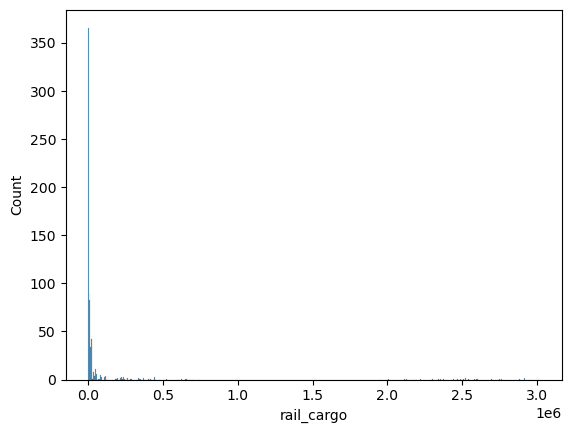

In [ ]:
sns.histplot(keqiang['rail_cargo'])

[Text(0.5, 0, 'log(rail cargo)'), Text(0, 0.5, 'Count')]

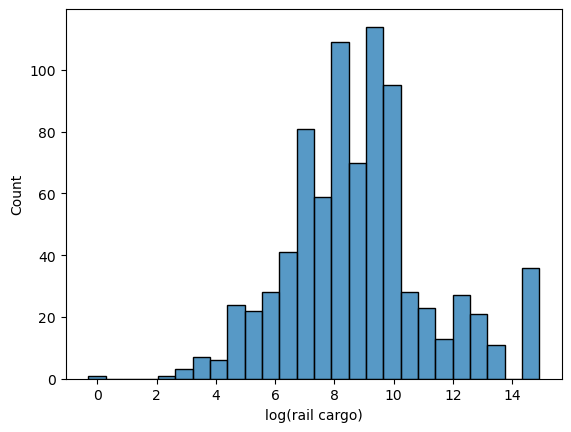

In [ ]:
# Logarithmed
ax = sns.histplot([math.log(item) for item in keqiang['rail_cargo']])
ax.set(xlabel='log(rail cargo)', ylabel='Count')

### Energy consumption

<Axes: xlabel='energy_cons', ylabel='Count'>

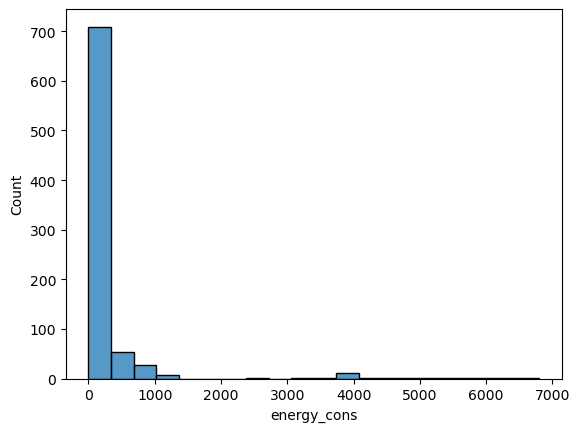

In [ ]:
sns.histplot(keqiang['energy_cons'])

[Text(0.5, 0, 'log(energy_cons)'), Text(0, 0.5, 'Count')]

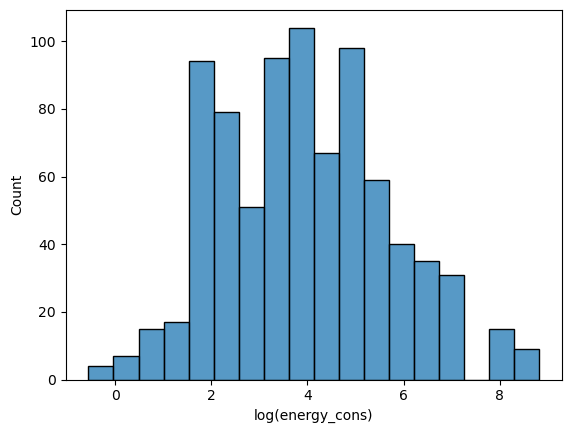

In [ ]:
# Logarithmed
ax = sns.histplot([math.log(item) for item in keqiang['energy_cons']])
ax.set(xlabel='log(energy_cons)', ylabel='Count')

### GDP

<Axes: xlabel='GDP', ylabel='Count'>

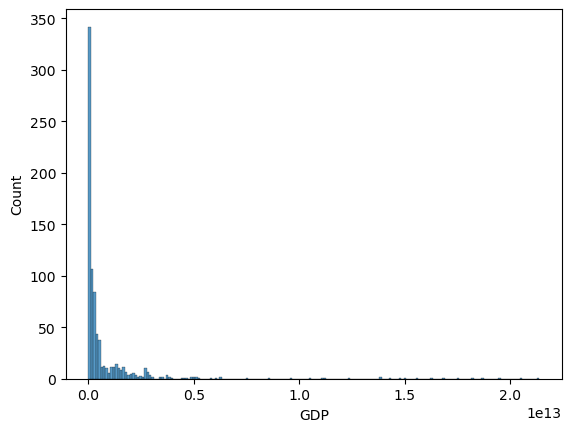

In [ ]:
sns.histplot(keqiang['GDP'])

[Text(0.5, 0, 'log(GDP)'), Text(0, 0.5, 'Count')]

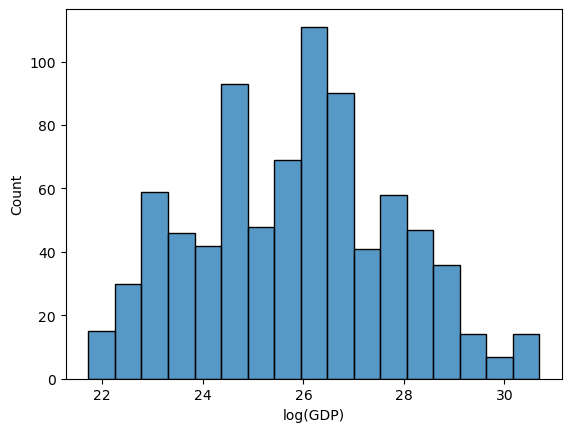

In [ ]:
# Logarithmed
ax = sns.histplot([math.log(item) for item in keqiang['GDP']])
ax.set(xlabel='log(GDP)', ylabel='Count')

### Democracy Index

<Axes: xlabel='Democracy Index', ylabel='Count'>

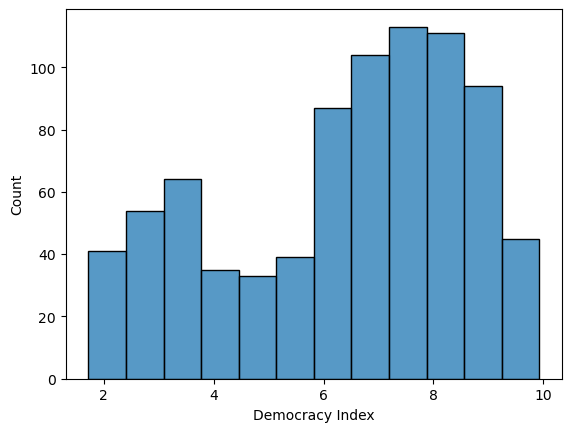

In [ ]:
sns.histplot(keqiang['Democracy Index'])

### Percent Urban

<Axes: xlabel='urban_per', ylabel='Count'>

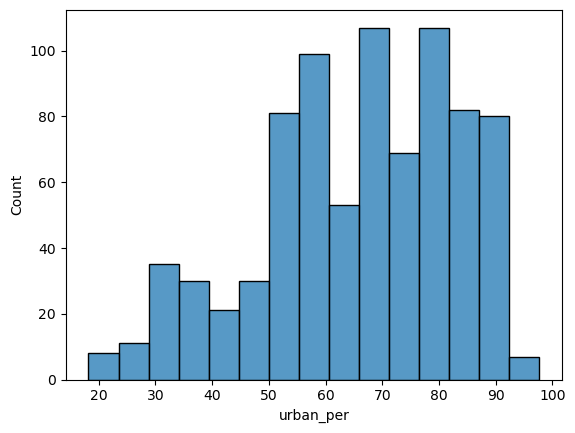

In [ ]:
sns.histplot(keqiang['urban_per'])

### Percent of economy from services

<Axes: xlabel='service_per', ylabel='Count'>

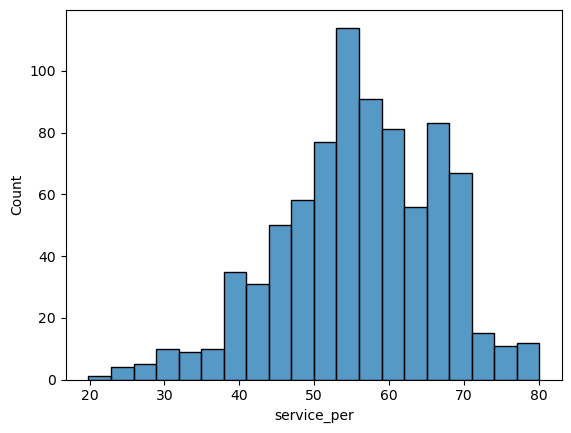

In [ ]:
sns.histplot(keqiang['service_per'])

## Region analysis

### Count of data by region

Central and Eastern Europe         312
Western Europe                     195
Asia and Australasia               140
Middle East and North Africa        75
Sub-Saharan Africa                  38
Latin America and the Caribbean     36
North America                       24
Name: Region, dtype: int64

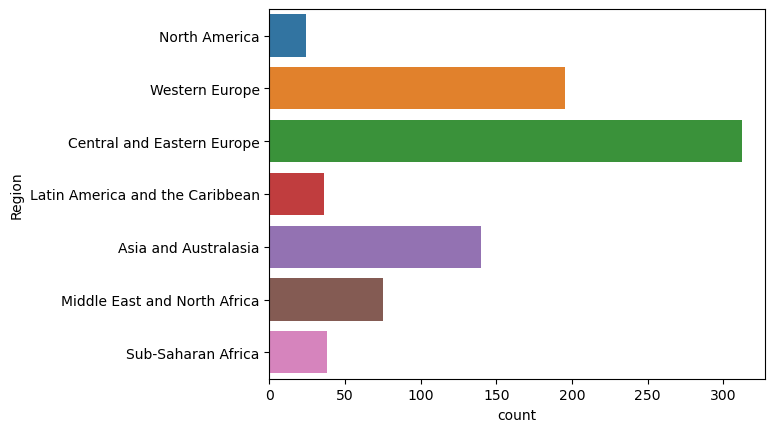

In [ ]:
sns.countplot(data = keqiang, y= 'Region')
keqiang['Region'].value_counts()

### Count of countries with any missing values

Text(0.5, 1.0, 'Countries with missing values by region')

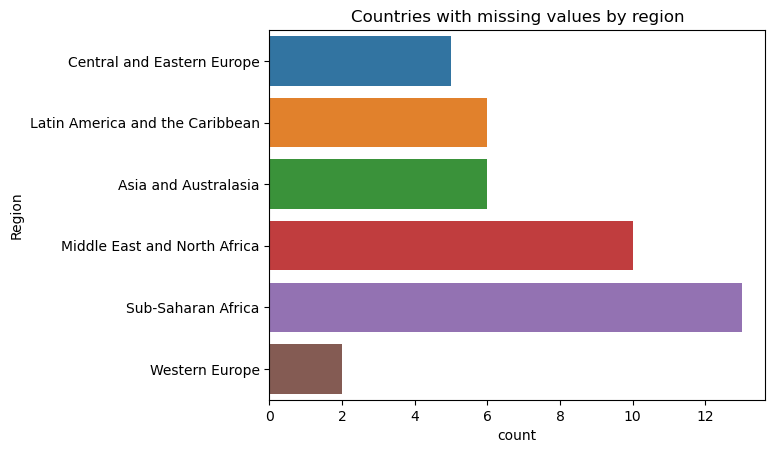

In [ ]:
vc = keqiang['Country'].value_counts() < 12
vc = vc[vc]

dropped_countries = keqiang.loc[keqiang['Country'].isin(vc.index)][['Country','Region']].drop_duplicates()
dropped_countries['Region'].value_counts()
ax = sns.countplot(data = dropped_countries, y = 'Region')
ax.set_title('Countries with missing values by region')

## Pair plots

### Raw data pair plot

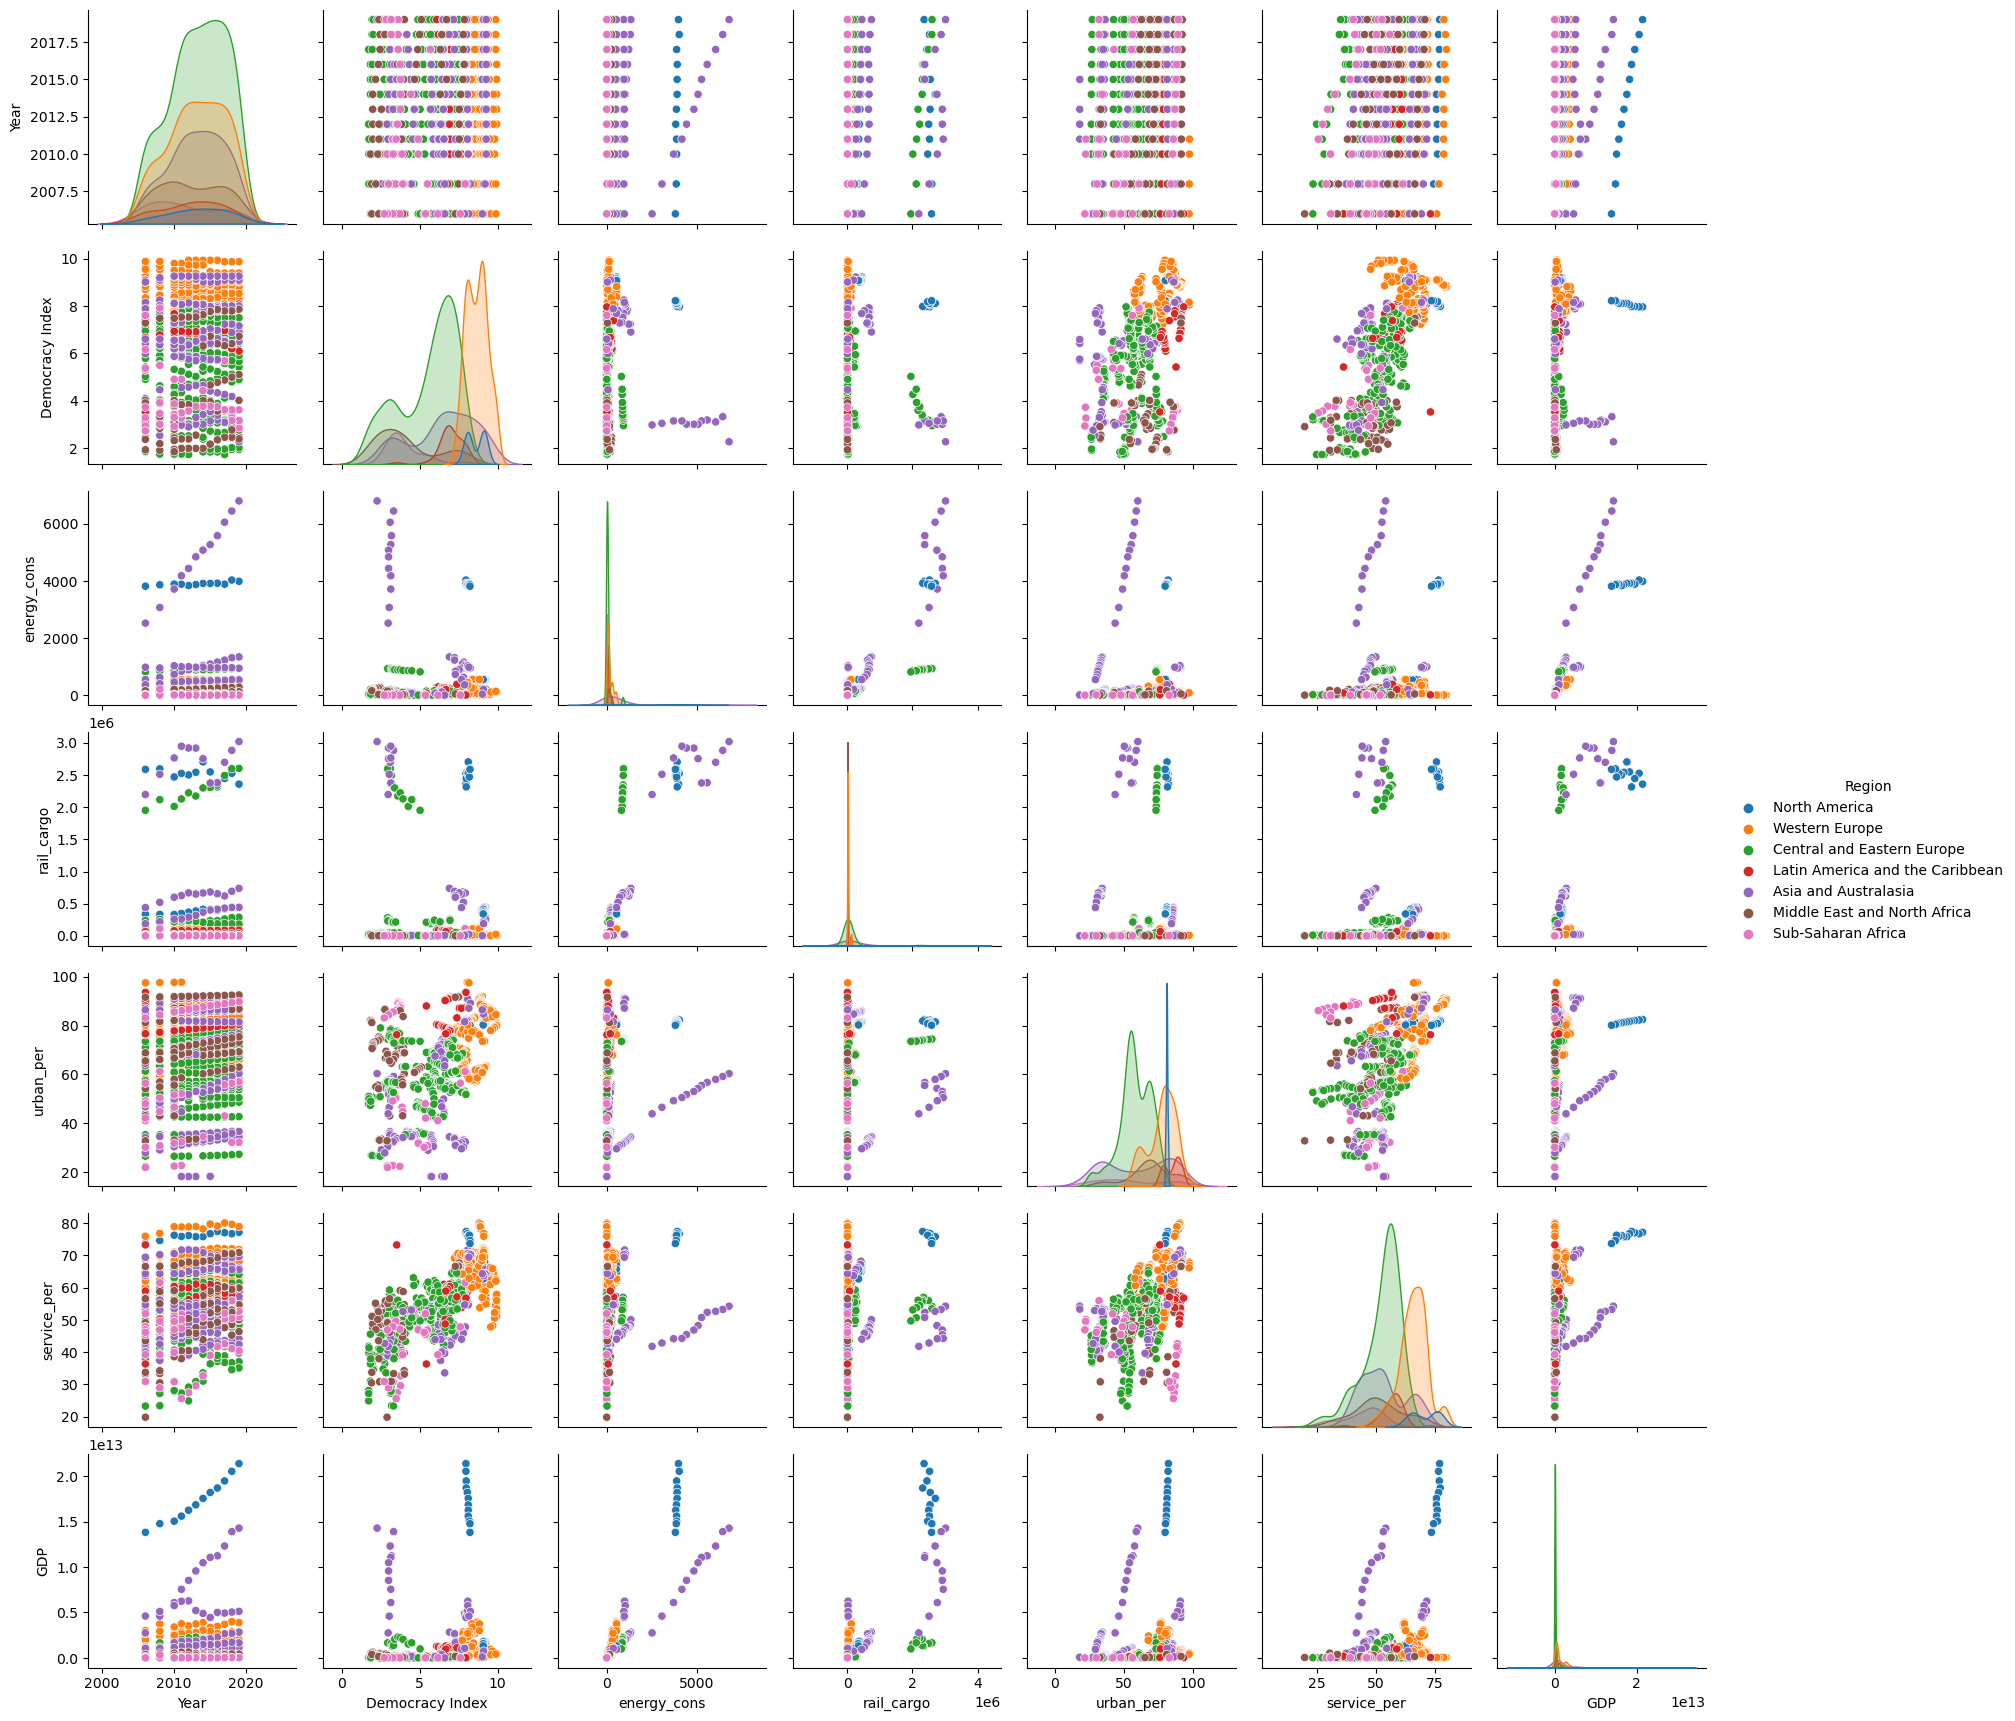

In [151]:
sns.pairplot(keqiang, hue = 'Region')

### Pair plot with GDP, Rail Cargo, and Electricity consumption logarithmed

In [152]:
keqiang_log = keqiang.copy()
keqiang_log['GDP'] = [math.log(item) for item in keqiang['GDP']]
keqiang_log['rail_cargo'] = [math.log(item) for item in keqiang['rail_cargo']]
keqiang_log['energy_cons'] = [math.log(item) for item in keqiang['energy_cons']]

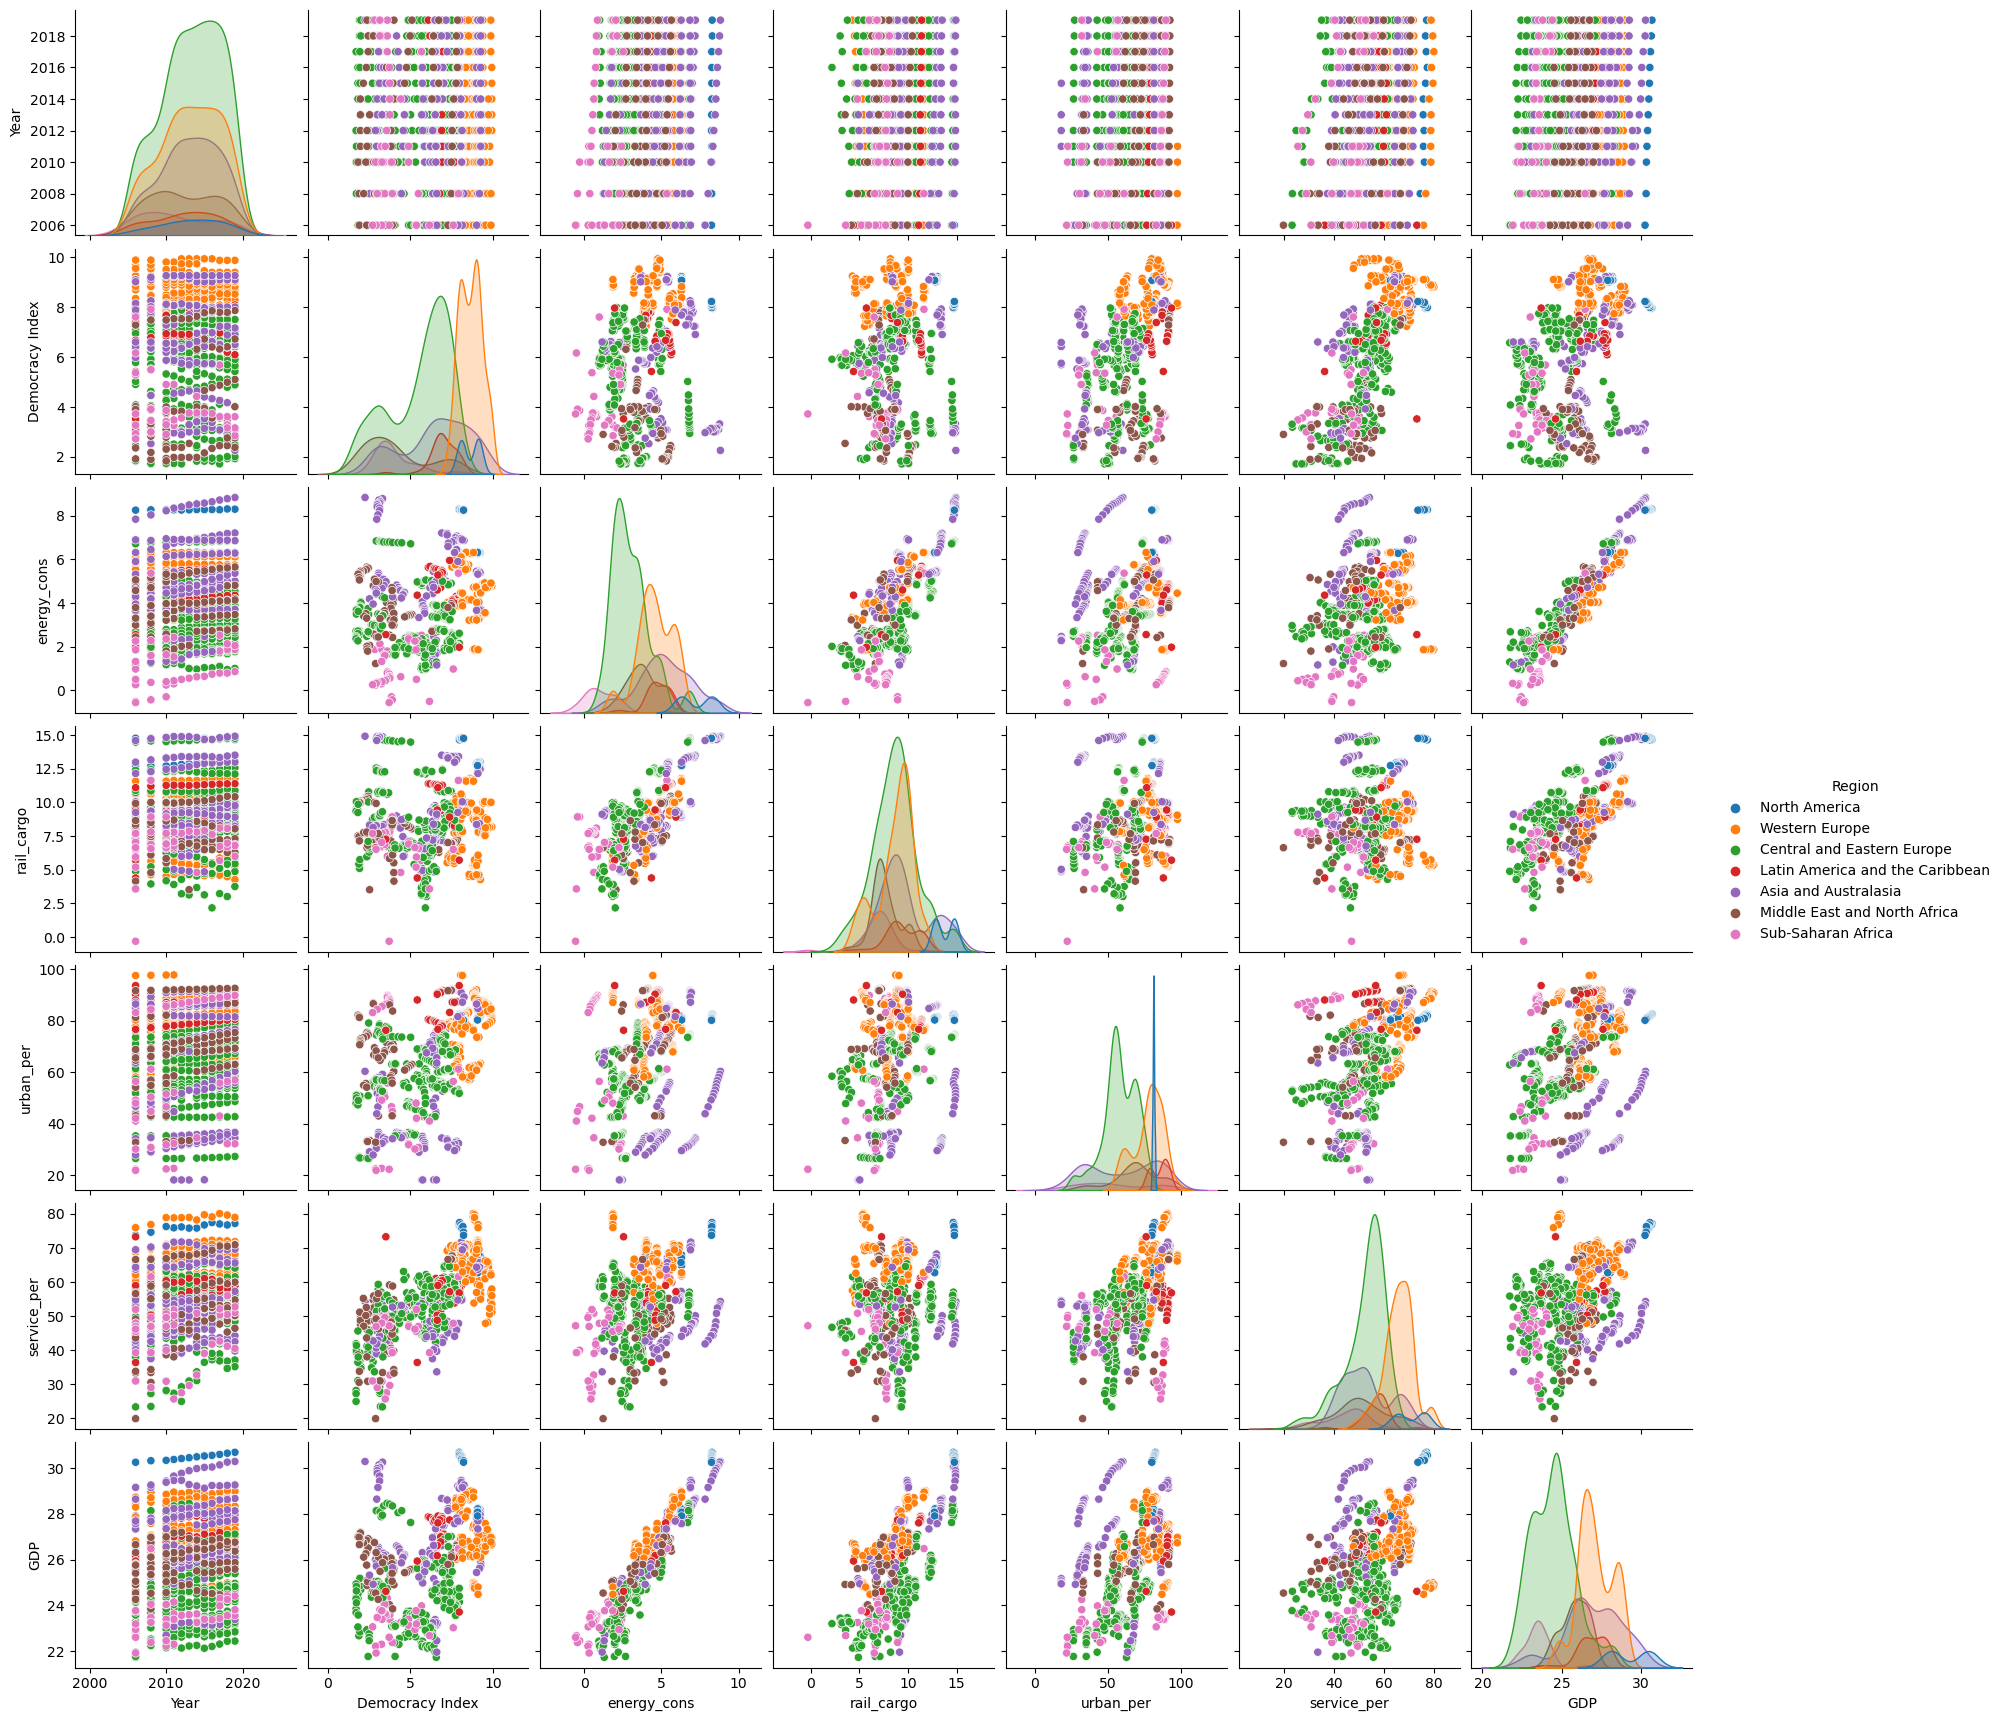

In [153]:
sns.pairplot(keqiang_log, hue = 'Region')